# Model Fine Tuning: Regularization

Rafiq Islam  
2024-09-24

## Introduction

Regularization is a key concept in machine learning that helps prevent
overfitting, improve model generalization, and make models more robust
to new data. It adds a penalty to the loss function to discourage the
model from fitting the noise in the training data, which leads to
**overfitting**.

-   **Overfitting** occurs when a model performs well on the training
    data but fails to generalize to new, unseen data. This happens when
    the model is too complex and captures both the signal and the noise
    in the data.

-   **Underfitting**, on the other hand, happens when a model is too
    simple to capture the underlying patterns in the data, resulting in
    poor performance even on the training set.

Regularization helps strike a balance between overfitting and
underfitting by controlling model complexity and encouraging simpler
models that generalize better.

## Types of Regularization

There are several types of regularization techniques used in machine
learning, with the most common being:

-   **$L_2$ Regularization (Ridge Regression)**
-   **$L_1$ Regularization (Lasso Regression)**
-   **Elastic Net Regularization**
-   **Dropout (for neural networks)**

Here we will discus the first two kind only.

------------------------------------------------------------------------

## $L_2$ Regularization (Ridge Regression)

**$L_2$ regularization** (also known as **Ridge regression** in linear
models) adds a penalty term to the loss function proportional to the sum
of the squared coefficients (weights) of the model. The goal is to
minimize both the original loss function and the magnitude of the
coefficients.

For a linear regression model, the objective is to minimize the
following regularized loss function:

$$
J(\theta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 + \lambda \sum_{j=1}^{p} \theta_j^2
$$

Where:

-   $\hat{y_i}$ is the model’s predicted output for input $x_i$.
-   $y_i$ is the true target value.
-   $\theta_j$ are the model parameters (coefficients).
-   $\lambda$ is the regularization strength, controlling the magnitude
    of the penalty (higher $\lambda$ increases regularization).

**More about $\lambda$**

-   $\lambda$ is a continuous non-negative scaler value, typically a
    floating-point number.  
-   Minimum $\lambda=0$, model becomes the standard linear regression
    model. For smaller $\lambda$ the regularization effect is minimal,
    allowing the model to fit the training data more closely.
-   In theory, there is no upper bound for $\lambda$. However, as
    $\lambda$ increases, the model becomes more regularized, and the
    coefficients tend to shrink toward zero.

Selecting the optimal value of $\lambda$ is crucial. Typically, it’s
done via cross-validation, where different values of $\lambda$ are
tried, and the model is evaluated based on its performance on the
validation set. The value that results in the best generalization is
selected.

$L_2$ regularization shrinks the coefficients towards zero but doesn’t
force them to be exactly zero, thus retaining all features in the model.

Mean Squared Error (Linear Regression): 0.92
Mean Squared Error (Ridge Regression): 0.92

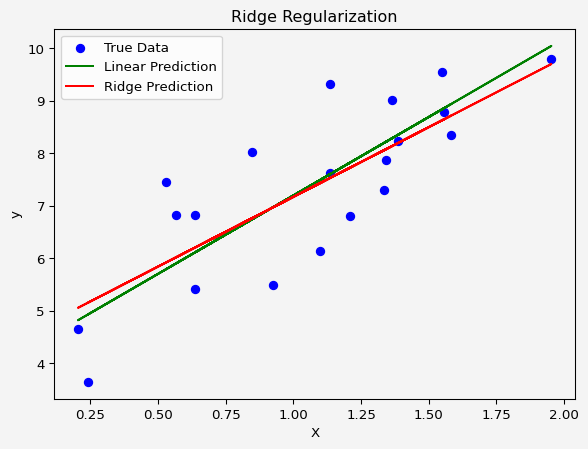

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LinearRegression model 
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error (Linear Regression): {mse_linear:.2f}")

# Train Ridge regression model (L2 Regularization)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
ridge_model = Ridge(alpha=10)  # alpha is the regularization strength (lambda)
ridge_model.fit(X_train_sc, y_train)

# Predictions and evaluation
y_pred_ridge = ridge_model.predict(X_test_sc)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error (Ridge Regression): {mse_ridge:.2f}")

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='True Data')
plt.plot(X_test, y_pred_linear, color='green', label='Linear Prediction')
plt.plot(X_test, y_pred_ridge, color='red', label='Ridge Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regularization')
plt.legend()
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.savefig('rg.png')
plt.show()

In this example, `alpha` corresponds to $\lambda$, the regularization
strength. A higher value of `alpha` will result in stronger
regularization, shrinking the model coefficients more.

------------------------------------------------------------------------

## $L_1$ Regularization (Lasso Regression)

**$L_1$ regularization** (also known as **Lasso regression**) adds a
penalty term proportional to the sum of the absolute values of the
coefficients. This type of regularization can force some coefficients to
be exactly zero, effectively performing feature selection.

The objective function for L1 regularization is:

$$
J(\theta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 + \lambda \sum_{j=1}^{p} |\theta_j|
$$

Where:

-   The terms are the same as those for $L_2$ regularization.
-   The penalty is the absolute value of the coefficients instead of the
    squared value.

$L_1$ regularization has the effect of making some coefficients exactly
zero, which means it can be used to reduce the number of features in the
model.

Mean Squared Error (Linear Regression): 0.92
Mean Squared Error (Lasso Regression): 1.02

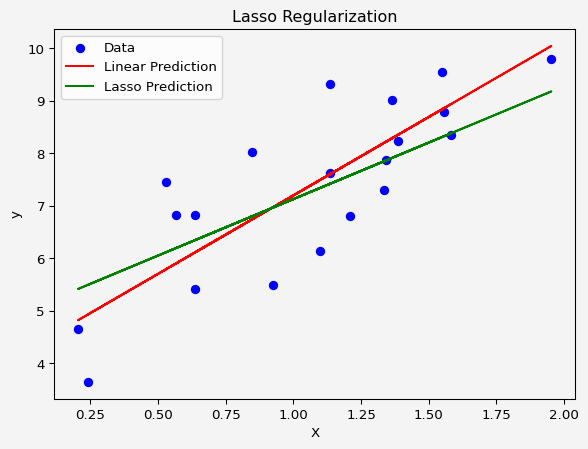

In [2]:
from sklearn.linear_model import Lasso

print(f"Mean Squared Error (Linear Regression): {mse_linear:.2f}")

# Train Lasso regression model (L1 Regularization)
lasso_model = Lasso(alpha=.5)  # alpha is the regularization strength (lambda)
lasso_model.fit(X_train_sc, y_train)

# Predictions and evaluation
y_pred_lasso = lasso_model.predict(X_test_sc)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Mean Squared Error (Lasso Regression): {mse_lasso:.2f}")

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Data')
plt.plot(X_test, y_pred_linear, color='red', label='Linear Prediction')
plt.plot(X_test, y_pred_lasso, color='green', label='Lasso Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Lasso Regularization')
plt.legend()
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

## Discussion

### Choosing the Right $\lambda$

Selecting the optimal value of $\lambda$ is crucial. Typically, it’s
done via cross-validation, where different values of $\lambda$ are
tried, and the model is evaluated based on its performance on the
validation set. The value that results in the best generalization is
selected.

### Impact of $\lambda$ on Bias-Variance Trade-off

-   Low $\lambda$: Leads to a low bias and high variance model because
    the model closely fits the training data.
-   High $\lambda$: Leads to a high bias and low variance model, as the
    regularization prevents the model from fitting the training data too
    closely, reducing the variance but increasing the bias.

### Facts

Scaling is required for both Ridge and Lasso regression as they are not
scale invariant due to the different norms in the definition.

<table data-quarto-postprocess="true" data-border="1"
data-cellpadding="10" data-cellspacing="0">
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr>
<th data-quarto-table-cell-role="th">Criteria</th>
<th data-quarto-table-cell-role="th">L1 Regularization (Lasso)</th>
<th data-quarto-table-cell-role="th">L2 Regularization (Ridge)</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>Feature Selection</strong></td>
<td>Can set some coefficients exactly to zero, effectively performing
feature selection.</td>
<td>Does not set coefficients to zero; shrinks them but retains all
features.</td>
</tr>
<tr>
<td><strong>Handling Multicollinearity</strong></td>
<td>Not ideal for handling highly correlated features, as it may
arbitrarily select one feature and discard the others.</td>
<td>Works better in the presence of multicollinearity, as it tends to
spread the penalty across correlated features.</td>
</tr>
<tr>
<td><strong>Effect on Coefficients</strong></td>
<td>Sparse solutions; coefficients are either zero or relatively large,
favoring simpler models with fewer features.</td>
<td>Coefficients are small and distributed more evenly across all
features, leading to less sparse solutions.</td>
</tr>
<tr>
<td><strong>Interpretability</strong></td>
<td>Easier to interpret, as some features are removed, simplifying the
model.</td>
<td>All features remain in the model, making it harder to interpret when
there are many features.</td>
</tr>
<tr>
<td><strong>Computational Complexity</strong></td>
<td>Can be computationally intensive with a large number of features due
to the non-smooth nature of the L1 penalty.</td>
<td>Less computationally expensive due to its smooth penalty term
(squared coefficients).</td>
</tr>
<tr>
<td><strong>Best Suited For</strong></td>
<td>When you want a sparse model with feature selection, and when the
number of irrelevant features is large.</td>
<td>When you want to retain all features, especially in cases of
multicollinearity, and avoid overfitting by shrinking coefficients.</td>
</tr>
<tr>
<td><strong>When to Use</strong></td>
<td><ul>
<li>When you expect only a few features to be important.</li>
<li>When you want automatic feature selection.</li>
<li>When you need a simple, interpretable model.</li>
</ul></td>
<td><div class="cell raw">
<li>
</div>
When you believe all features contribute to the target.
<div class="cell raw">
</li>
</div>
<div class="cell raw">
<li>
</div>
When dealing with multicollinear data.
<div class="cell raw">
</li>
</div>
<div class="cell raw">
<li>
</div>
When you want to prevent overfitting but don’t want feature elimination.
<div class="cell raw">
</li>
</div></td>
</tr>
</tbody>
</table>

------------------------------------------------------------------------

## References

1.  **Tibshirani, R.** (1996). Regression shrinkage and selection via
    the lasso. *Journal of the Royal Statistical Society: Series B
    (Methodological)*, 58(1), 267-288.

2.  **Hoerl, A. E., & Kennard, R. W.** (1970). Ridge regression: Biased
    estimation for nonorthogonal problems. *Technometrics*, 12(1),
    55-67.

3.  **Zou, H., & Hastie, T.** (2005). Regularization and variable
    selection via the elastic net. *Journal of the Royal Statistical
    Society: Series B (Statistical Methodology)*, 67(2), 301-320.

4.  **Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., &
    Salakhutdinov, R.** (2014). Dropout: A simple way to prevent neural
    networks from overfitting. *Journal of Machine Learning Research*,
    15(1), 1929-1958.

5.  **Goodfellow, I., Bengio, Y., & Courville, A.** (2016). *Deep
    Learning*. MIT Press.

6.  **Murphy, K. P.** (2012). *Machine Learning: A Probabilistic
    Perspective*. MIT Press.

------------------------------------------------------------------------

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/dsandml/posts/regularization/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/dsandml/posts/regularization/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/dsandml/posts/regularization/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**